# Проверка гипотиз по увеличению выручки в интернет-магазине

**Заказчик**: отдел маркетинга крупного интернет-магазина.

**Цель**: проверить гипотизы для увеличения выручки.

**Задачи**: 

 - Приоритизировать гипотезы;
 - Запустить A/B-тест и проанализировать его результаты.
 

**План проекта**:

 1. Загрузка и обзор данных;
 2. Приотиризация гипотез;
 3. Анализ А/В-теста;
 4. Вывод по проекту.

## Предобработка данных

### Загрузка данных, вывод общей информации о датасетах

In [1]:
# подключаем библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings

Загрузим файлы и ознакомимся с данными:

In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),  # файл с гипотезами
    pd.read_csv('orders.csv'),  # заказы
    pd.read_csv('visitors.csv'),  # журнал посещений а/в теста   
    )
except FileNotFoundError:
    hypothesis, orders, visitors = (
    pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),  # файл с гипотезами
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),  # заказы
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'),  # журнал посещений 
    )
except Exception:
    print("Some other exception")  

Задаем функцию для изучения датасетов:

In [3]:
# функция для первичного изучения датасетов:
def information_about_df (df: pd.DataFrame, limit_na_category: int = 10 ) -> None:
    print('Вывод шапки таблицы:')
    display(df.head())
    print('-'*40)
    print('Вывод общей информации:')
    print('')
    print(df.info())
    print('-'*40)
    print('Количество пропусков в данных:')
    print('')
    count = 0
    shape_0 = df.shape[0]
    for element in df.columns:
        if df[element].isna().sum()>0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков, ', 
                  round(df[element].isna().sum()*100 / shape_0,2), '% от числа строк.')
            count = +1
        if count == 0:
            print(element,'- пропусков НЕТ')   
    print('-'*40)
    print('Количество дубликатов в данных:')
    print('')
    if df.duplicated().sum() >0:
        print('Дубликатов:', df.duplicated().sum())
    else:
        print('Дубликатов НЕ найдено')

#### Датасет "hypothesis"

In [4]:
information_about_df(hypothesis)

Вывод шапки таблицы:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


----------------------------------------
Вывод общей информации:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
----------------------------------------
Количество пропусков в данных:

Hypothesis - пропусков НЕТ
Reach - пропусков НЕТ
Impact - пропусков НЕТ
Confidence - пропусков НЕТ
Efforts - пропусков НЕТ
----------------------------------------
Количество дубликатов в данных:

Дубликатов НЕ найдено


Пропусков и дубликатов нет.

**Структура файла "Hypothesis":**

 - **Hypothesis** — краткое описание гипотезы;
 - **Reach** — охват пользователей по 10-балльной шкале;
 - **Impact** — влияние на пользователей по 10-балльной шкале;
 - **Confidence** — уверенность в гипотезе по 10-балльной шкале;
 - **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Сразу приведем названия колонок к нижнему регистру:

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

#### Датасет "orders"

In [6]:
information_about_df(orders)

Вывод шапки таблицы:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


----------------------------------------
Вывод общей информации:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
----------------------------------------
Количество пропусков в данных:

transactionId - пропусков НЕТ
visitorId - пропусков НЕТ
date - пропусков НЕТ
revenue - пропусков НЕТ
group - пропусков НЕТ
----------------------------------------
Количество дубликатов в данных:

Дубликатов НЕ найдено


Пропусков и дубликатов нет.

**Структура файла "orders":**

 - **transactionId** — идентификатор заказа;
 - **visitorId** — идентификатор пользователя, совершившего заказ;
 - **date** — дата, когда был совершён заказ;
 - **revenue** — выручка заказа;
 - **group** — группа A/B-теста, в которую попал заказ.

Приведем колонки к змеиному регистру:

In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Сменим тип данных у колонки с датами:

In [8]:
orders['date'] = pd.to_datetime(orders['date'])

#### Датасет "visitors"

In [9]:
information_about_df(visitors)

Вывод шапки таблицы:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


----------------------------------------
Вывод общей информации:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
----------------------------------------
Количество пропусков в данных:

date - пропусков НЕТ
group - пропусков НЕТ
visitors - пропусков НЕТ
----------------------------------------
Количество дубликатов в данных:

Дубликатов НЕ найдено


Пропусков и дубликатов нет.

**Структура файла "visitors":**

 - **date** — дата;
 - **group** — группа A/B-теста;
 - **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста.

Сменим тип данных у колонки с датами:

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'])

### Проверка на дубликаты и аномалии

При выводе общей информации дубликатов и пропусков мы не наши, проверим значения колонок файлов на скрытые дубликаты и аномалии.

In [11]:
# функция для вывода уникальных значений столбцов:
def unique_values (df: pd.DataFrame):
     for element in df.columns:
            print('')
            print(element, ':')
            print('')
            print(df[element].sort_values().unique())

1. файл **"hypothesis"**:

In [12]:
unique_values(hypothesis)


hypothesis :

['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию']

reach :

[ 1  2  3  5  8 10]

impact :

[ 1  2  3  5  7  9 10]

confidence :

[1 2 3 4 7 8 9]

efforts :

[ 1  3  5  6  8 10]


Ничего аномального, скрытых дубликатов не видно.

2. файл **"orders"**:

In [13]:
unique_values(orders)


transaction_id :

[   1062393    4919758    7210578 ... 4281129020 4288552432 4293855558]

visitor_id :

[   5114589    6958315    8300375 ... 4279090005 4281247801 4283872382]

date :

['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-18T00:00:00.000000000'
 '2019-08-19T00:00:00.000000000' '2019-08-20T00:00:00.000000000'
 '2019-08-21T00:00:00.000000000' '2019-08-22T00:00:00.000000000'
 '2019-08-23T00:00:00.000000000' '2019-08-24T00:00:00.000000000'
 '2019-08-25T00:00:00.000000000' 

Также ничего аномального, скрытых дубликатов не видно.

2. файл **"visitors"**:

In [14]:
unique_values(visitors)


date :

['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-18T00:00:00.000000000'
 '2019-08-19T00:00:00.000000000' '2019-08-20T00:00:00.000000000'
 '2019-08-21T00:00:00.000000000' '2019-08-22T00:00:00.000000000'
 '2019-08-23T00:00:00.000000000' '2019-08-24T00:00:00.000000000'
 '2019-08-25T00:00:00.000000000' '2019-08-26T00:00:00.000000000'
 '2019-08-27T00:00:00.000000000' '2019-08-28T00:00:00.000000000'
 '2019-08-29T00:00:00.000000000' '2019-08-30T00:00:00.000000000'
 '2019-08-31T00:

Никаких аномалий.

### Вывод 

В этой главе мы загрузили файлы, ознакомились с данными, исправили там, где это было нужно, регистр. Никаких аномалий, скрытых или явных дубликатов выявлено не было, можно переходить к приоритизирузации гипотиз.

## Приоритизация гипотез

### ICE

Приоритизируем гипотезы методом ICE:

In [15]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']                                                                    
hypothesis_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
pd.set_option('display.max_colwidth', 0)
hypothesis_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Согласно методу ICE, наиболее перспективны гипотезы:** 

 - Запустить акцию, дающую скидку на товар в день рождения;
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

**Гипотезы средней перспективности:**
 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

**Малоперспективные гипотезы:**

 - Запустить собственную службу доставки, что сократит срок доставки заказов;
 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

### RICE

Приоритизируем гипотезы методом RICE:

In [16]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
pd.set_option('display.max_colwidth', 0)
hypothesis_rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Согласно методу ICE, наиболее перспективны гипотезы:**

 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

**Гипотезы средней перспективности:**

 - Запустить акцию, дающую скидку на товар в день рождения;
 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

**Малоперспективные гипотезы:**

 - Запустить собственную службу доставки, что сократит срок доставки заказов;
 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

Выведем результаты RICE и ICE одновременно для удобства сравнения:

In [17]:
ice_rice = hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='ICE', ascending=False).round(2)
ice_rice

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


### Вывод

По итогам проведения приоритизации методами **ICE** и **RICE**, мы видим, что есть отличия в оценке гипотиз. Произошло это из-за того, что в RICE используется дополнительный параметр в числителе - **Reach**, показывающий скольких пользователей затронет изменение, которое мы хотим внести. 

При этом, мы видим, что в лидерах обоих методов есть **два пересечения**, это гипотезы:

 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.


Эти две гипотезы отнесены к перспективным по итогам применения обоих методов. Малоперспективные гипотезы также, в основном, совпали.

## Анализ A/B-теста

### Подготовка к тесту

Перед тем, как начать анализировать результаты теста, проверим корректность данных. 

**1. Сначала посчитаем количество данных в обеих группах теста:**

In [18]:
print('Пользователей в группе "А":')
orders[orders['group'] == "A"].count()

Пользователей в группе "А":


transaction_id    557
visitor_id        557
date              557
revenue           557
group             557
dtype: int64

In [19]:
print('Пользователей в группе "В":')
orders[orders['group'] == "B"].count()

Пользователей в группе "В":


transaction_id    640
visitor_id        640
date              640
revenue           640
group             640
dtype: int64

In [20]:
print('Разница между группами, %:')
round(3/640, 4)

Разница между группами, %:


0.0047

Разница хоть и есть, но совсем незначительная, < 5%.

**2. Посмотрим есть ли пользователи, которые попали в обе группы:**

In [21]:
same_users = orders.groupby('visitor_id').agg({'group':'nunique'})
same_users = same_users[same_users['group']>1]
print('Пользователи, которые попали в обе группы:')
print(same_users.count())

Пользователи, которые попали в обе группы:
group    58
dtype: int64


In [22]:
print('Процент пользователей, попавших в обе группы от общего числа:')
round(58/1197*100, 2)

Процент пользователей, попавших в обе группы от общего числа:


4.85

58 пользователей, которые есть и в группе "А" и в группе "В". Процент также небольшой, 4,85%.
Проверим, не могло ли так получиться, что это дубликаты, которые случайно попали в обе группы, или же это все-таки независимые заказы.

In [23]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').head()

,group
visitor_id,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2


Посмотрим пару произвольных пользователей подробнее:

In [24]:
orders[orders['visitor_id'] == 232979603]

,transaction_id,visitor_id,date,revenue,group
1009,2670069237,232979603,2019-08-31,2640,B
1013,83566152,232979603,2019-08-31,60,A


In [25]:
orders[orders['visitor_id'] == 8300375]

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


Хоть **id** пользователей и совпадают, но заказы разные, на разные суммы выручки с заказа.

Удалим колонку с группой теста и проверим, не могло ли так получиться, что какие-то заказы задублировались сразу в обе группы:

In [26]:
orders_drop_group = orders.drop(['group'], axis='columns')
orders_drop_group.duplicated().sum()

0

Оснований полагать, что это дубли у нас нет, удалить мы эти данные не можем. Вполне вероятно,что одни и теже пользователи могут осуществлять несколько заказов за рассматриваемый период, и даже по несколько заказов в день. При каждом новом заказе они могли быть определены в разные группы.

Посмотрим выручку от этих пользователей:

In [27]:
same_users_orders = orders.merge(same_users, left_on='visitor_id', right_on=same_users.index)

print(
    "Доля выручки пользователей, попавших в обе группы: {:.2%}"
    .format(same_users_orders['revenue'].sum()/orders['revenue'].sum())
)

Доля выручки пользователей, попавших в обе группы: 15.60%


Хотя пользователей, которые попали в обе группы всего ≈ 5%, удалить мы их не можем, так как:

 - Это не дубли, в группы попали разные независимые заказы этих польователей;
 - Процент выручки по этим пользователям - 15,6%, слишком значительная цифра, чтобы удалить данные этих заказов.
 
**Проводим анализ теста с этими пользователями, ничего не удаляем.**

**3. Проверим даты:**

In [28]:
# группа "А":
group_a = orders[orders['group'] == "A"]
print('Минимальная дата:', group_a['date'].min())
print('Максимальная дата:', group_a['date'].max())

Минимальная дата: 2019-08-01 00:00:00
Максимальная дата: 2019-08-31 00:00:00


In [29]:
# группа "В":
group_a = orders[orders['group'] == "B"]
print('Минимальная дата:', group_a['date'].min())
print('Максимальная дата:', group_a['date'].max())

Минимальная дата: 2019-08-01 00:00:00
Максимальная дата: 2019-08-31 00:00:00


С датами все в порядке. 

**4. Проверим распределение выручки на нормальность, узнаем есть ли выбросы:**

In [30]:
sample = orders['revenue']

alpha = 0.05

results = stats.shapiro(sample)
p_value = results[1] 
print(stats.shapiro(sample))
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

ShapiroResult(statistic=0.10345423221588135, pvalue=0.0)
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выбросы есть, это нужно будет учесть в последующем анализе. Переходим к изучению результатов А/В теста.

### Сбор кумулятивных метрик

Группируем данные по датам и группам:

In [31]:
register_matplotlib_converters()
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам

Строим график кумулятивной выручки по обеим группам:

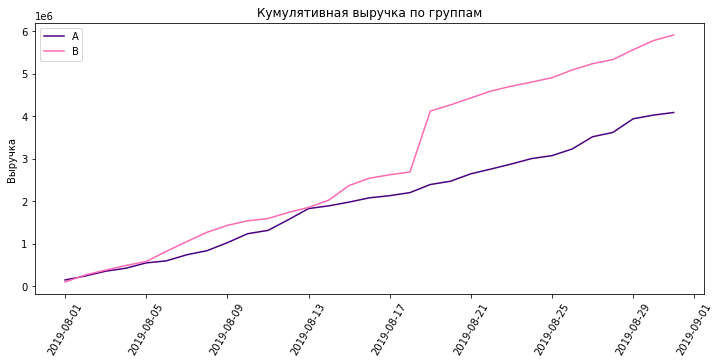

In [32]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.subplots(figsize = (12, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A', color='#4B0082')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B', color='#FF69B4')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.xticks(rotation = 60); 

По графику мы видим, что с первых дней теста по выручке лидирует группа "В". 
Также, мы видим, что в районе 2019-08-17 - 2019-08-19 произошел резкий скачoк графика группы "В". Произойти это могло по двум причинам: увеличение количества заказов или же увеличением суммы заказов. Возможно в эти даты были совершены какие-либо заказы на нетипично большие суммы.

В следующих шагах мы проанализируем значения и решим, нужно ли отсечь какие-либо аномальные значения показателей, которые могут повлиять на результат сравнения.

### График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам:

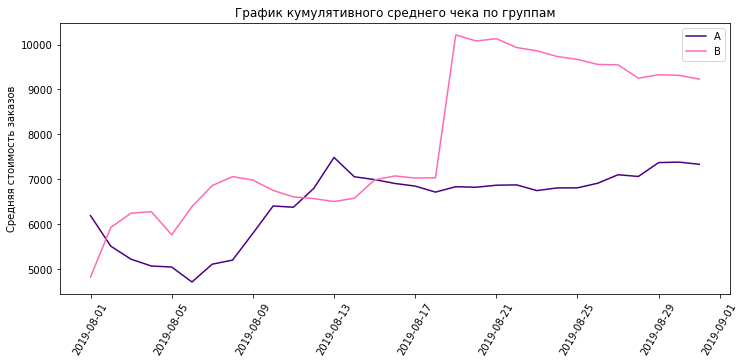

In [33]:
plt.subplots(figsize = (12, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
         label='A', color='#4B0082')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
         label='B', color='#FF69B4')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средняя стоимость заказов')
plt.xticks(rotation = 60)
plt.legend(); 

По графику мы также видим, что лидирует группа "В". Хоть и есть пересечение с группой "А" примерно с 10 по 15 число, в дальнейшем группа "В" значительно опережает по показателю группу "А". 

Как и на предыдущем графике, мы видим резкий скачок в районе 2019-08-17 - 2019-08-21 чисел, это подтверждает предположение о заказах на аномально большие суммы в этих числах. Далее по графику линия группы "В" показывает снижение и, примерно, с 27 числа до конца теста становится относительно стабильной. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

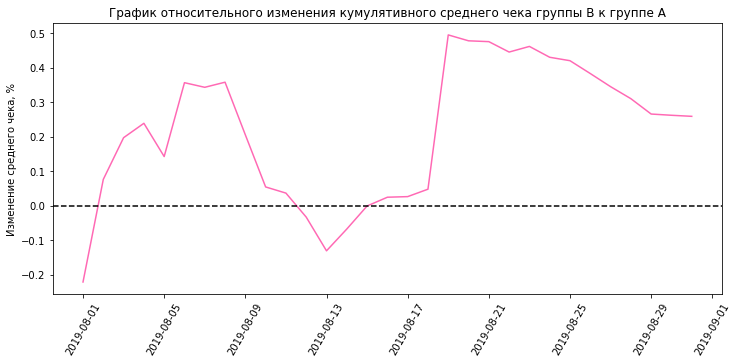

In [34]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.subplots(figsize = (12, 5))
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1, 
         color='#FF69B4')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение среднего чека, %')
plt.xticks(rotation = 60)
plt.axhline(y=0, color='black', linestyle='--'); 

На графике видны резкие перепады, которые также могут говорить о совершении аномальных заказов. Даты совпадают с предыдущими двумя графиками.

### График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам:

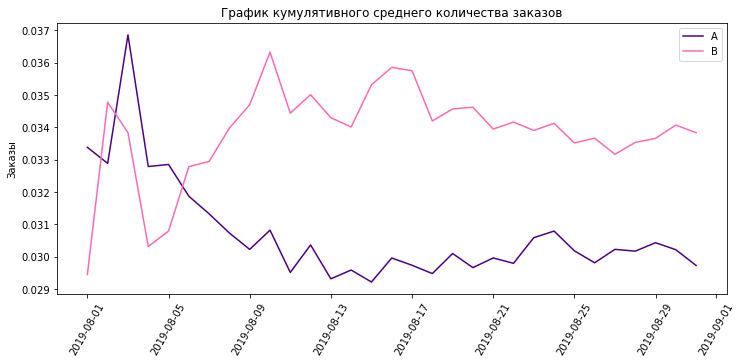

In [35]:
cumulative_data['orders_mean'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
plt.subplots(figsize = (12, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['orders_mean'], label='A', color='#4B0082')
plt.plot(cumulative_data_b['date'], cumulative_data_b['orders_mean'], label='B', color='#FF69B4')
plt.title('График кумулятивного среднего количества заказов')
plt.ylabel('Заказы')
plt.xticks(rotation = 60)
plt.legend();

По данному графику мы также видим, что стабильно лидирует группа "В", хотя в самом начале не долго лидировала группа "А".

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A 

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

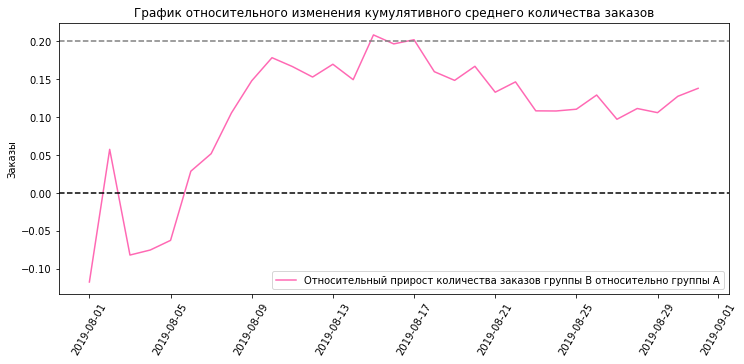

In [36]:
merged_cumulative_orders_mean = cumulative_data_a[['date','orders_mean']].merge(cumulative_data_b[['date','orders_mean']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 
plt.subplots(figsize = (12, 5))
plt.plot(merged_cumulative_orders_mean['date'], 
         merged_cumulative_orders_mean['orders_meanB']/merged_cumulative_orders_mean['orders_meanA']-1, 
         label="Относительный прирост количества заказов группы B относительно группы A", color='#FF69B4')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов')
plt.ylabel('Заказы')
plt.xticks(rotation = 60);

Группа "В" на протяжении всего анализа в лидерах. На этом графике мы видим, что относительный прирост заказов в группе "В" к 15 числу достиг уровня 20%, далее он снизился до ≈ 14% к концу теста.

### Точечный график количества заказов по пользователям

Построим точечный график количества заказов по пользователям:

,visitor_id,transaction_id
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


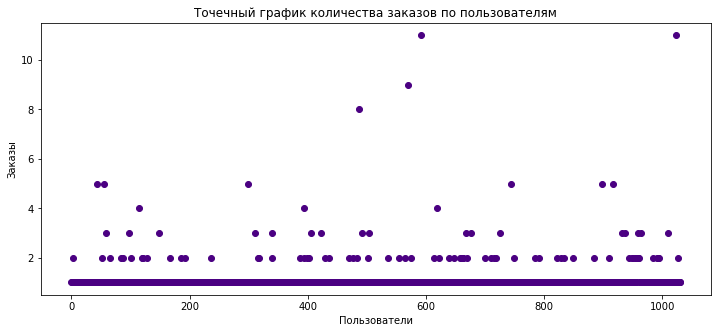

In [37]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'transaction_id']
display(orders_by_users.sort_values(by='transaction_id', ascending=False).head(5))
x_values = pd.Series(range(0, len(orders_by_users)))
x_values = pd.Series(range(0,len(orders_by_users['transaction_id'])))
plt.subplots(figsize = (12, 5))
plt.scatter(x_values, orders_by_users['transaction_id'], color='#4B0082')
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Заказы')
plt.xlabel('Пользователи'); 

По графику видно, что чаще всего количество заказов на одного пользователя - 1, на втором месте - 2 заказа на потребителя. Есть пользователи с числом заказов от 3 до 5. Изредка встречается число заказов от 8 до 11, таких значений мало, вероятно это аномальные заказы.

### Расчет 95-й и 99-й перцентили количества заказов на пользователя

Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя:

In [38]:
print('Перцентили [95, 99]:', np.percentile(orders_by_users['transaction_id'], [95, 99]), "заказов.")

Перцентили [95, 99]: [2. 4.] заказов.


Не более 5% пользователей заказывали более, чем 2 заказа, и не более 1% заказывали больше 4 заказов. Для отсечения данных выберем 99 перцентиль, отсечение 5% будет уже слишком значительным.

### Точечный график стоимостей заказов

Построим точечный график стоимостей заказов:

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


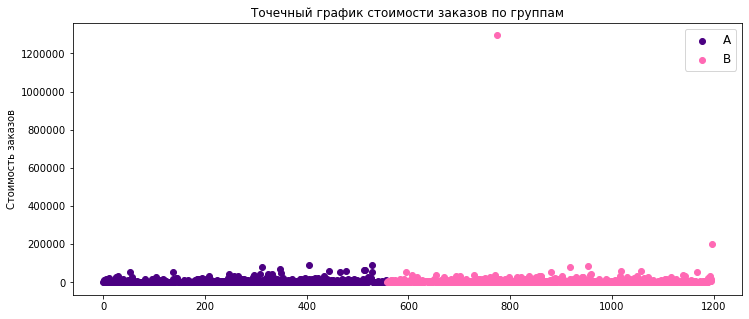

In [39]:
orders.sort_values(by='revenue', ascending=False).head(10)
x_values = pd.Series(range(0, len(orders['revenue'])))
display(orders.sort_values(by='revenue', ascending=False).head(5))

orders_A = orders[orders['group']=='A']
x_values_A = pd.Series(range(0,len(orders_A['revenue'])))
orders_B = orders[orders['group']=='B']
x_values_B = pd.Series(range(len(orders_A['revenue'])+1,len(orders_B['revenue'])+1+len(orders_A['revenue'])))

plt.subplots(figsize = (12, 5))
plt.scatter(x_values_A, orders_A['revenue'], label='A', color='#4B0082')
plt.scatter(x_values_B, orders_B['revenue'], label='B', color='#FF69B4')
plt.ylabel("Стоимость заказов")
plt.legend(fontsize=12)
plt.title("Точечный график стоимости заказов по группам")
plt.ticklabel_format(axis='y',style='plain');

Большинство заказов не превышают стоимость в 100 тысяч, есть единичный заказ на сумму ≈ 202 тысячи, и есть аномальный на 1 миллион 294 тысячи. Оба этих заказа, как мы видим, попадают в группу "В". Отфильтруем эти два заказа, чтобы посмотреть по подробнее заказы на сумму ниже 200 тысяч:

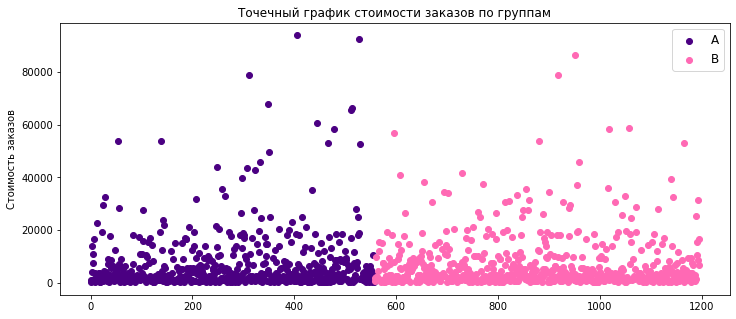

In [40]:
orders_without_anormal = orders[orders['revenue'] <= 200000]
x_values = pd.Series(range(0, len(orders_without_anormal['revenue'])))

orders_A = orders_without_anormal[orders_without_anormal['group']=='A']
x_values_A = pd.Series(range(0,len(orders_A['revenue'])))
orders_B = orders_without_anormal[orders_without_anormal['group']=='B']
x_values_B = pd.Series(range(len(orders_A['revenue'])+1,len(orders_B['revenue'])+1+len(orders_A['revenue'])))

plt.subplots(figsize = (12, 5))
plt.scatter(x_values_A, orders_A['revenue'], label='A', color='#4B0082')
plt.scatter(x_values_B, orders_B['revenue'], label='B', color='#FF69B4')
plt.ylabel("Стоимость заказов")
plt.legend(fontsize=12)
plt.title("Точечный график стоимости заказов по группам")
plt.ticklabel_format(axis='y',style='plain');

Основная часть заказов не превышает 20 тысяч рублей, большинство из них укладывается в сумму 10 тысяч рублей. Заказы свыше 200 тысяч явно выбросы, влияющие на всю картину. 

### Расчет 95-й и 99-й перцентили стоимости заказов

Рассчитаем перцентили:

In [41]:
print('Перцентили [95, 99]:', np.percentile(orders['revenue'], [95, 99]), "стоимости заказов.")

Перцентили [95, 99]: [28000.  58233.2] стоимости заказов.


Не более 5% заказов на сумму более 28 тысяч, не более 1% заказов на сумму свыше 58 тысяч. Также, как и с заказами, можно будет отсечь данные по 99 перцентилю.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

**Сформулируем гипотезы:** 

 - **Нулевая**: различий в среднем количестве заказов между группами нет. 
 - **Альтернативная**: различия в среднем между группами есть.

In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id']

sampleA = pd.concat(
    [
        ordersByUsersA['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Относительный прирост: 0.138


P-value меньше 0,05, нулевую гипотизу мы отвергаем. Анализ показал, что в среднем количестве заказов на посетителя между группами по «сырым» данным статистически значимые различия есть. Относительный прирост среднего группы "В" к группе "А" = 13,8%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Аналогично предыдущему шагу, рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Сформулируем гипотезы:**

 - **Нулевая гипотеза**: различий в среднем чеке между группами нет. 
 - **Альтернативная гипотеза**: различия в среднем чеке между группами есть.

In [43]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие:',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительное различие: 0.259


P-value  у нас получился больше 0,05, а значит статистически значимых различий в среднем чеке между двумя группами нет. 
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке нет - не отвергаем. Но при этом, относительное различие - 25,9%. Возможно дело в аномальных суммах.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Очистим данные от аномалий. Удалять мы будем пользователей, у которых количество заказов более 4 и сумма заказа более 58 000, то есть по 99 перцентилям.

Соберем аномальных пользователей в отдельный список:

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > np.percentile(orders_by_users['transaction_id'], 99)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > np.percentile(orders_by_users['transaction_id'], 99)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Сформулируем гипотезы:** 

 - **Нулевая**: различий в среднем количестве заказов между группами нет. 
 - **Альтернативная**: различия в среднем между группами есть.

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.01438
Относительный прирост: 0.153


P-value меньше 0,05, нулевую гипотизу мы отвергаем. Анализ показал, что в среднем количестве заказов на посетителя между группами по «очищенным» данным статистически значимые различия есть. Относительный прирост среднего группы "В" к группе "А" = 15,3%.

Небольшая разница с результатами расчета по сырым данным, результаты схожи.

Статистическая значимость достигнута, значения группы "В" лучше группы "А".

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Сформулируем гипотезы:**

 - **Нулевая гипотеза**: различий в среднем чеке между группами нет. 
 - **Альтернативная гипотеза**: различия в среднем чеке между группами есть.

In [46]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.851
Относительное различие: -0.006


P-value у нас получился больше 0,05, а значит статистически значимых различий в среднем чеке между двумя группами нет. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке нет - не отвергаем. Но при этом, относительное различие - (-0.06%). Совсем незначительно чек группы "А" больше. 

### Вывод

**В этой главе мы проанализировали результаты А/В теста и выяснили, что:**

 - С первых дней теста по кумулятивной выручке лидирует группа "В";
 - По кумулятивному среднему чеку также лидирует группа "В";
 - По кумулятивному среднему количеству заказов на посетителя по группам лидер, опять же, группа "В";
 - Относительный прирост заказов в группе "В" к 15 числу достиг уровня 20%, далее он снизился до ≈ 14% к концу теста;
 - В количестве заказов и суммах обнаружены аномальные значения, в следующих шагах мы их исключили по 99 перцентиль;
 - В среднем количестве заказов на посетителя между группами по «сырым» данным статистически значимые различия есть. Относительный прирост среднего группы "В" к группе "А" = 13,8%;
 - В среднем количестве заказов на посетителя между группами по «очищенным» данным статистически значимые различия есть. Относительный прирост среднего группы "В" к группе "А" = 15,3%. Статистическая значимость достигнута, значения группы "В" лучше группы "А";
 - Статистически значимых различий в среднем чеке между двумя группами нет, не по "сырым" данным, не по "очищенным".
 
**Тест успешный, останавливаем. Победила группа "В"**

## Заключение

 <div style="border: solid #4B0082 2px; padding: 20px; font-size: 16px;">
    
<b>В данном проекте мы проделали следующие шаги:

 - Загрузили и предобработали данные;
 
 - Сделали приоритизацию гипотиз посредством методов ICE и RICE. При этом, мы видим, что в лидерах обоих методов есть **два пересечения**, это гипотезы:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
 
 - Проанализировали результаты А/В теста:
    - Рассмотрели изменение кумулятивного среднего чека по группам (лидер - "В");
    - Рассмотрели относительное изменение кумулятивного среднего чека группы B к группе A;
    - Рассмотрели кумулятивное среднее количества заказов на посетителя по группам (лидер - "В");
    - Рассмотрели относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A (прирост "В" около 14% к "А");
    - Рассмотрели количество заказов по пользователям и стоимость заказов. Рассчитали 95 и 99 перцентили, исключили аномальные значения по 99 перцентилям;
    - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» и "очищенным" данным (Статистическая значимость достигнута, значения группы "В" лучше группы "А");
    - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» и "очищенным" данным. Различий не обнаружено.
    
 - А/В тест признан успешным, лидер - группа "В". 
</div>